### Objective 1: Design a simple perceptron without using any library functions

In [4]:
from numpy import random

gInputs = []

class Perceptron():

    def setWeights(self, weightNum):
        weights = []
        for i in range(weightNum):
            weights.append(random.rand() * 2 - 1)
        return weights

    def activate(self, weights, inputs):
        global gInputs
        gInputs = inputs
        sum = 0
        for i in range(len(inputs)):
            sum += weights[i] * inputs[i]
        if sum >= 0:
            return 1
        else:
            return -1

    def updateWeights(self, learningRate, desired, sum):
        global gInputs
        newWeights = []
        print ("DESIRED ", desired)
        if desired != sum:
            error = desired - sum
            print("ERROR ", error)
            length = len(gInputs)
            for i in range(0, length):
                newWeights.append(learningRate * error * gInputs[i])
            return {'newWeights': newWeights, 'iterate': True}
        else:
            print("SUCCESS")
            return {'newWeights': newWeights, 'iterate': False}
        
inputs = [-1,-1,1]
weightNum = len(inputs)
weights = 0
learningRate = 0.01
desired = 1
iterate = True
iterCount = 0

ptron = Perceptron()
weights = ptron.setWeights(weightNum)
while iterate:
    print("-"*70)
    print("Initial Weights: ", weights)
    sum = ptron.activate(weights, inputs)
    print("Sum: ", sum)
    returned = ptron.updateWeights(learningRate, desired, sum)
    print("New Weights: ", returned['newWeights'])
    if not returned['iterate']:
        print("Iterations: ", iterCount)
        iterate = False
        print("-"*70)
    else:
        weights = returned['newWeights']
        iterCount = iterCount + 1

----------------------------------------------------------------------
Initial Weights:  [0.27685064004629956, -0.9783287312534501, -0.7949347483259039]
Sum:  -1
DESIRED  1
ERROR  2
New Weights:  [-0.02, -0.02, 0.02]
----------------------------------------------------------------------
Initial Weights:  [-0.02, -0.02, 0.02]
Sum:  1
DESIRED  1
SUCCESS
New Weights:  []
Iterations:  1
----------------------------------------------------------------------


### Objective 2 - Creating a dataset using rand function

In [5]:
import random
import numpy as np

X = np.array([
    [random.randint(1, 500) for _ in range(750)],
    [random.randint(250, 600) for _ in range(750)]
])
X = X.T  # Transpose to have shape (750, 2)
y = np.array([random.randint(1, 24) for _ in range(750)])


### Objective 3 - i) Using the synthesized dataset, implement an ANN

In [6]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression (single neuron)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=2)

loss, test_mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on Test Set: {test_mse:.2f}")

# Print training accuracy at each epoch
for epoch, train_mse in enumerate(history.history['mean_squared_error'], 1):
    print(f"Epoch {epoch}: Train MSE: {train_mse:.2f}")

Epoch 1/50
17/17 - 1s - loss: 201.0600 - mean_squared_error: 201.0600 - val_loss: 207.6643 - val_mean_squared_error: 207.6643 - 1s/epoch - 71ms/step
Epoch 2/50
17/17 - 0s - loss: 183.6464 - mean_squared_error: 183.6464 - val_loss: 185.4725 - val_mean_squared_error: 185.4725 - 68ms/epoch - 4ms/step
Epoch 3/50
17/17 - 0s - loss: 160.1468 - mean_squared_error: 160.1468 - val_loss: 156.8612 - val_mean_squared_error: 156.8612 - 86ms/epoch - 5ms/step
Epoch 4/50
17/17 - 0s - loss: 130.5539 - mean_squared_error: 130.5539 - val_loss: 121.6181 - val_mean_squared_error: 121.6181 - 70ms/epoch - 4ms/step
Epoch 5/50
17/17 - 0s - loss: 97.6689 - mean_squared_error: 97.6689 - val_loss: 87.0832 - val_mean_squared_error: 87.0832 - 70ms/epoch - 4ms/step
Epoch 6/50
17/17 - 0s - loss: 71.7170 - mean_squared_error: 71.7170 - val_loss: 63.4615 - val_mean_squared_error: 63.4615 - 63ms/epoch - 4ms/step
Epoch 7/50
17/17 - 0s - loss: 58.8295 - mean_squared_error: 58.8295 - val_loss: 55.5542 - val_mean_squared_er

### Objective 3 - ii) Using a Kaggle dataset, implement an ANN

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [9]:
data1=df.iloc[:,[3,4,5,6,7,8,9,10,1,12,13]]
data1

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  CustomerId  EstimatedSalary  Exited  
0             1    15634602        101348.88       1  
1             0    15647311        112542.58       0  
2             1    15619304        113931.57       1  
3             0    15701354         93826.63       0  
4             1    15737888         79084.10       0  
...         ...         ...              ...     ...  
9995          1    15606229         96270.64       0  
9996          1    15569892        101699.77       0  
9997          0    15584532         42085.58       1  
9998          1    15682355         92888.52       1  
9999          1    15628319         38190.78       0  

[10000 rows x 11 columns]

Encoding categorical data

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label encoding 'Gender' and 'Geography'

l1 = LabelEncoder()
data1["Geography"]=l1.fit_transform(data1["Geography"])
data1["Gender"]=l1.fit_transform(data1["Gender"])
data1

/tmp/ipykernel_6844/496365326.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Geography"]=l1.fit_transform(data1["Geography"])
/tmp/ipykernel_6844/496365326.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["Gender"]=l1.fit_transform(data1["Gender"])


CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  CustomerId  EstimatedSalary  Exited  
0             1    15634602        101348.88       1  
1             0    15647311        112542.58       0  
2             1    15619304        113931.57       1  
3             0    15701354         93826.63       0  
4             1    15737888         79084.10       0  
...         ...         ...              ...     ...  
9995          1    15606229         96270.64       0  
9996          1    15569892        101699.77       0  
9997          0    15584532         42085.58       1  
9998          1    15682355         92888.52       1  
9999          1    15628319         38190.78       0  

[10000 rows x 11 columns]

In [11]:
x=data1.iloc[:,:-1].values
y=data1.iloc[:,-1].values

In [12]:
#Feature Scaling  use Normalization

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
p=scaler.fit_transform(x)
p

array([[0.538     , 0.        , 0.        , ..., 1.        , 0.27561613,
        0.50673489],
       [0.516     , 1.        , 0.        , ..., 0.        , 0.32645436,
        0.56270874],
       [0.304     , 0.        , 0.        , ..., 1.        , 0.21442143,
        0.56965435],
       ...,
       [0.718     , 0.        , 0.        , ..., 0.        , 0.07532731,
        0.21039009],
       [0.844     , 0.5       , 1.        , ..., 1.        , 0.46663653,
        0.46442905],
       [0.884     , 0.        , 0.        , ..., 1.        , 0.25048302,
        0.19091423]])

Splitting dataset

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=88)

Building ANN

In [14]:
from keras.models import Sequential
from keras.layers import Dense

ann = Sequential()

# Input layer
ann.add(Dense(units=6, activation='relu'))

ann.add(Dense(units=6, activation='relu'))

# Output layer
ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fit the ANN to training set

In [15]:
history = ann.fit(x_train, y_train, batch_size = 32, epochs = 100)  

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 43033.6680 - accuracy: 0.5620
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6477 - accuracy: 0.7961
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5986 - accuracy: 0.7961
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5654 - accuracy: 0.7961
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5431 - accuracy: 0.7961
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5283 - accuracy: 0.7961
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5190 - accuracy: 0.7961
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5132 - accuracy: 0.7961
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5098 - accuracy: 0.7961
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5079 - ac

In [16]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))
print('Accuracy: ',ann.evaluate(x_test,y_test)[1])

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]
63/63 [==============================] - 0s 2ms/step - loss: 0.5045 - accuracy: 0.7970
Accuracy:  0.796999990940094


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)*100

[[1594    0]
 [ 406    0]]


79.7

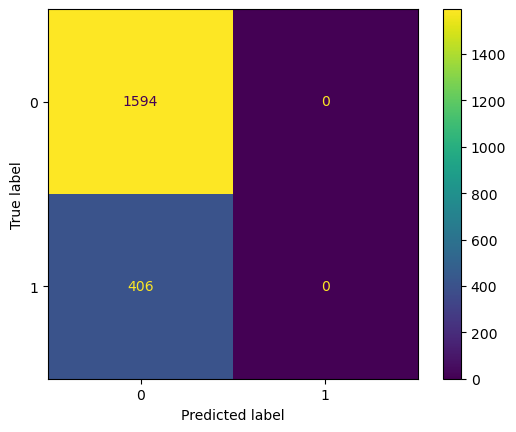

In [15]:
from sklearn import metrics
Confusion_Matrix=metrics.confusion_matrix(y_test,y_pred)
cm_display=metrics.ConfusionMatrixDisplay(Confusion_Matrix)
cm_display.plot()
plt.show()